In [1]:
import toolz as tz
from toolz import curried as c
from sklearn import decomposition
from sklearn import datasets
import numpy as np

def streaming_pca(samples, n_components=2, batch_size=100):
    ipca = decomposition.IncrementalPCA(n_components=n_components,
                                        batch_size=batch_size)
    tz.pipe(samples,  # iterator of 1D arrays
            c.partition(batch_size),  # iterator of tuples
            c.map(np.array),  # iterator of 2D arrays
            c.map(ipca.partial_fit),  # partial_fit on each
            tz.last)  # Suck the stream of data through the pipeline
    return ipca

In [2]:
reshape = tz.curry(np.reshape)

def array_from_txt(line, sep=',', dtype=np.float):
    return np.array(line.rstrip().split(sep), dtype=dtype)

with open('../data/iris.csv') as fin:
    pca_obj = tz.pipe(fin, c.map(array_from_txt), streaming_pca)

In [3]:
with open('../data/iris.csv') as fin:
    components = tz.pipe(fin,
                         c.map(array_from_txt),
                         c.map(reshape(newshape=(1, -1))),
                         c.map(pca_obj.transform),
                         np.vstack)

print(components.shape)

(150, 2)


/home/af/Dokumenter/Programs/miniconda3/envs/ElegantSciPy-py38/lib/python3.8/site-packages/toolz/functoolz.py:634: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  data = func(data)


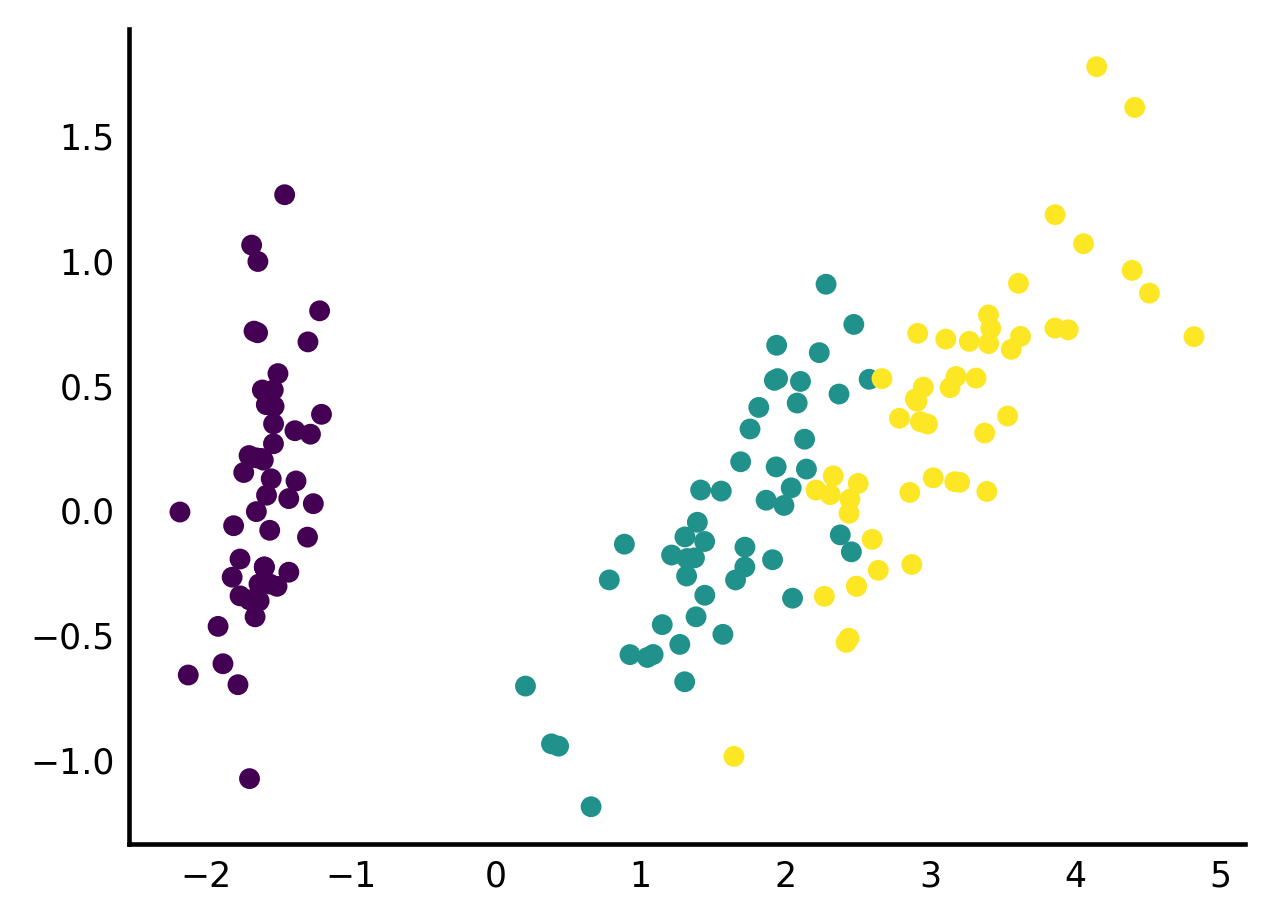

In [4]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../style/elegant.mplstyle')

iris_types = np.loadtxt('../data/iris-target.csv')
plt.scatter(*components.T, c=iris_types, cmap='viridis');

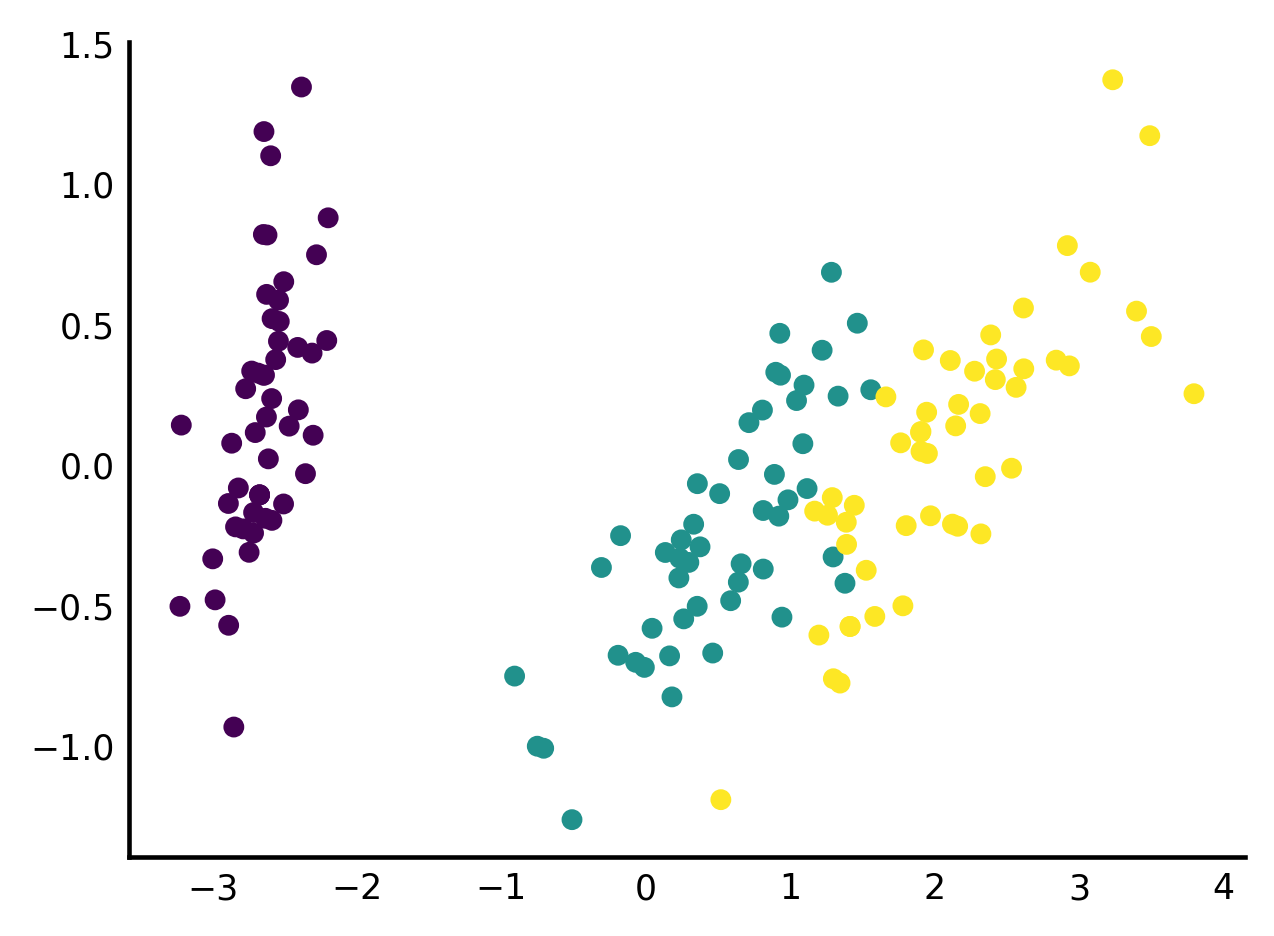

In [5]:
iris = np.loadtxt('../data/iris.csv', delimiter=',')
components2 = decomposition.PCA(n_components=2).fit_transform(iris)
plt.scatter(*components2.T, c=iris_types, cmap='viridis');